<h1>A Good Scare</h1>
<h4>What are the factors that make a successfull horror film?</h4>
<h2>Introduction</h2>
<p>Horror films have long captivated audiences with their ability to evoke fear and fascination. In our data science project, "A Good Scare: Factors that Make a Successful Horror Film," we aim to explore what makes a horror film successful. We've compiled a dataset of 32,540 horror films, including details like release dates, budgets, revenue, and audience engagement metrics.</p>
<p>Through data analysis and machine learning, we'll investigate how variables like budget, genre, and release timing correlate with a horror film's success. Our project provides valuable insights for filmmakers, producers, and horror enthusiasts, shedding light on the elements that create spine-tingling cinematic experiences.</p>
<p>Join us as we uncover the secrets behind the allure of horror cinema and explore the factors that transform a movie into a bone-chilling masterpiece.</p>

<h2>Initial Exploration of Dataset</h2>
<p>We began our data analysis by loading the dataset 'horror_movies.csv' using Python's Pandas library. This dataset contains information about horror films, including details like title, release date, budget, revenue, and more. Upon initial inspection, we found that our dataset comprises 32,540 entries with 20 columns. This provided an overview of the dataset's structure. Notably, some columns, such as 'overview,' 'tagline,' 'poster_path,' 'backdrop_path,' 'collection,' and 'collection_name,' have missing values, which we'll need to address during data preprocessing. Additionally, we observed a variety of data types, including integers, floats, strings, and a boolean. This initial exploration lays the foundation for our in-depth analysis, where we'll delve deeper into the data to uncover insights into the world of horror films.</p>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score


#loading the dataset 
horror_films_df = pd.read_csv('horror_movies.csv', sep = ',')

In [182]:
horror_films_df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


In [183]:
horror_films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32540 non-null  int64  
 1   original_title     32540 non-null  object 
 2   title              32540 non-null  object 
 3   original_language  32540 non-null  object 
 4   overview           31254 non-null  object 
 5   tagline            12706 non-null  object 
 6   release_date       32540 non-null  object 
 7   poster_path        28066 non-null  object 
 8   popularity         32540 non-null  float64
 9   vote_count         32540 non-null  int64  
 10  vote_average       32540 non-null  float64
 11  budget             32540 non-null  int64  
 12  revenue            32540 non-null  int64  
 13  runtime            32540 non-null  int64  
 14  status             32540 non-null  object 
 15  adult              32540 non-null  bool   
 16  backdrop_path      135

<h2>Initial Exploration of Summary Data</h2>
<p>In our data analysis process, we used the describe() method on our dataset, 'horror_films_df', to generate summary statistics for the numerical columns. Here's what we found:</p>

<p>The 'id' column represents unique identifiers for each film and has a count of 32,540, indicating that there are no missing values.</p>
<p>'Popularity' provides insights into the popularity of horror films, with a minimum value of 0 and a maximum of 5088.584. The mean popularity is approximately 4.01, but the 75th percentile is 2.2, this might suggest there are some outliers and need further examination.</p>
<p>'Vote_count' and 'vote_average' offer information on audience engagement and ratings. We see that the 'vote_count' ranges from 0 to 16,900, with a mean of approximately 62.69. The 'vote_average' ranges from 0 to 10, with a mean of about 3.34.</p>
<p>'Budget' and 'revenue' provide financial details of films. 'budget' ranges from 0 to 200 million, with a mean of around 543,126. 'revenue' ranges from 0 to 701,842,600, with a mean of approximately 1,349,747. Again here there may be some outliers in the data (those with a budget of 0 for example) This will require further examination</p>
<p>'Runtime' gives us insights into the duration of horror films, ranging from 0 to 683 minutes, with a mean runtime of about 62.14.The maximum runtime being so long and the minimum runtime being 0 suggests that there may be some outliers which again will need some examination</p>
<p>'Collection' is related to film collections and has a count of 2,306, indicating that there are numerous missing values in this column, which could be due to the fact that many of the films are not part of any collection</p>
<p>These summary statistics offer a valuable initial glimpse into the characteristics of our horror film dataset, setting the stage for more in-depth exploration and analysis of various aspects of the data.</p>
<p>The next step will be to further analyse where we predict there may be outliers. By visualising the data we will be able to see the extent and spread of the outliers before deciding on further action.</p>

In [184]:
horror_films_df.describe()

,id,popularity,vote_count,vote_average,budget,revenue,runtime,collection
count,3.254000e+04,32540.000000,32540.000000,32540.000000,3.254000e+04,3.254000e+04,32540.000000,2.306000e+03
mean,4.459108e+05,4.013456,62.691487,3.335728,5.431266e+05,1.349747e+06,62.142901,4.815349e+05
std,3.057447e+05,37.513472,420.887474,2.876002,4.542668e+06,1.443048e+07,40.998527,3.244982e+05
min,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.560000e+02
25%,1.464948e+05,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,14.000000,1.554210e+05
50%,4.265210e+05,0.840000,2.000000,4.000000,0.000000e+00,0.000000e+00,80.000000,4.712590e+05
75%,7.075340e+05,2.243250,11.000000,5.700000,0.000000e+00,0.000000e+00,91.000000,7.590672e+05
max,1.033095e+06,5088.584000,16900.000000,10.000000,2.000000e+08,7.018426e+08,683.000000,1.033032e+06


<h2>Analyzing Boxplots with Suspected Outliers</h2>

<p> The boxplots indeed reveal the presence of outliers, potentially impacting the data's integrity, especially in the "runtime," "revenue," and "budget" columns. It appears that some outliers in these columns are associated with an abundance of films having '0.0' values, which likely indicate data errors. Hence, we propose removing these entries from the dataset to observe whether this action leads to more interpretable and reliable results. Regarding the "popularity" column, it exhibits a mix of '0.0' results and unusually high values, possibly due to variations in data collection methodologies or interpretations. Regrettably, the dataset lacks documentation for interpreting this portion of the data, and there is no means to contact the original data source. Therefore, we suggest considering the removal of the entire "popularity" column from the dataset. </p>

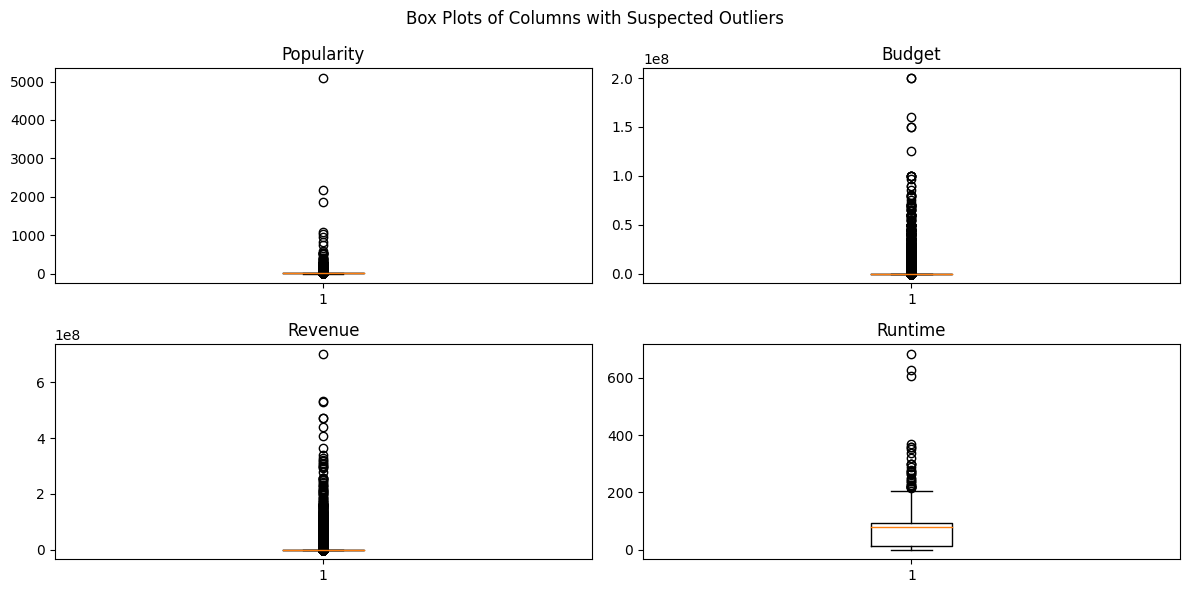

In [185]:
popularity = horror_films_df["popularity"]
budget = horror_films_df["budget"]
revenue = horror_films_df["revenue"]
runtime = horror_films_df["runtime"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Create box plots using Matplotlib's boxplot function
axes[0, 0].boxplot(popularity)
axes[0, 0].set_title("Popularity")

axes[0, 1].boxplot(budget)
axes[0, 1].set_title("Budget")

axes[1, 0].boxplot(revenue)
axes[1, 0].set_title("Revenue")

axes[1, 1].boxplot(runtime)
axes[1, 1].set_title("Runtime")

fig.suptitle("Box Plots of Columns with Suspected Outliers")

plt.tight_layout()

plt.show()

In [186]:
#removing the popularity column from the dataset
horror_films_df = horror_films_df.drop('popularity', axis = 1)

In [187]:
columns_to_check = ['budget', 'revenue', 'runtime']

for column in columns_to_check:
    horror_films_df = horror_films_df[horror_films_df[column] != 0]

<h1>Results of Removing Outliers</h1>
<p>The popularity column was removed and rows where budget, revenue and runtime were reported as 0 were also removed as these were clearly unreal statistics. As a result of this cleaning the number of entries decreased significantly to 1073. This is a significant reduction from the pre-cleaning number of 32540.</p>
<p>Having cleaned the columns in question, there still remain a large number of outliers on both the low end and the high end. The low level numbers could be the result of improper data entry, as we believe it is unlikely that a film has a budget of $1. The high end though could be due to other factors. The range of film budgets can vary drastically depending on wether it is a high budget hollywood blockbuster, or a small scale indie project. This factor can also affect the revenue of such a film, American films that have a global reach are more likely to earn large sums compared to unique titles from other countries for example.</p>
<p>A simlar line of thinking can also be made with regards to runtime, but with some differing explanations. The long runtime of some of these films (with the highest being in excess of 600 mins) could be explained as the film being a part of a series for example.</p>
<p>Having already lost a large number of items, and with a desire to keep enough to make the conclusions widely applicable, and considering that a lot of our analysis will take place at the higher level, the descision has been taken to forgo any further cleaning of these columns, especially considering that a lot of our analysis is going to take place at the top end of this scale, where the numbers reported are consistent with what we know of the subject area.</p>
<p>One additional step is necessary concerning the summary data in this dataset, to create a new column titled 'profit' which will be made by subtracting 'budget' from 'revenue'</p> 

In [188]:
horror_films_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 2 to 32384
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1073 non-null   int64  
 1   original_title     1073 non-null   object 
 2   title              1073 non-null   object 
 3   original_language  1073 non-null   object 
 4   overview           1071 non-null   object 
 5   tagline            956 non-null    object 
 6   release_date       1073 non-null   object 
 7   poster_path        1060 non-null   object 
 8   vote_count         1073 non-null   int64  
 9   vote_average       1073 non-null   float64
 10  budget             1073 non-null   int64  
 11  revenue            1073 non-null   int64  
 12  runtime            1073 non-null   int64  
 13  status             1073 non-null   object 
 14  adult              1073 non-null   bool   
 15  backdrop_path      983 non-null    object 
 16  genre_names        1073 non-

In [189]:
horror_films_df.describe()

,id,vote_count,vote_average,budget,revenue,runtime,collection
count,1.073000e+03,1073.000000,1073.000000,1.073000e+03,1.073000e+03,1073.000000,3.980000e+02
mean,1.745419e+05,1253.917055,5.788910,1.293597e+07,3.941130e+07,93.726934,2.296252e+05
std,2.518545e+05,1894.576306,1.695637,1.983775e+07,6.913201e+07,23.787206,2.630586e+05
min,8.300000e+01,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,6.560000e+02
25%,1.076600e+04,129.000000,5.400000,1.065000e+06,1.000000e+06,88.000000,1.283800e+04
50%,2.909500e+04,543.000000,6.000000,6.000000e+06,1.199201e+07,95.000000,1.151420e+05
75%,2.922800e+05,1591.000000,6.600000,1.500000e+07,4.584775e+07,104.000000,3.701750e+05
max,1.032494e+06,16900.000000,10.000000,2.000000e+08,7.018426e+08,179.000000,1.025281e+06


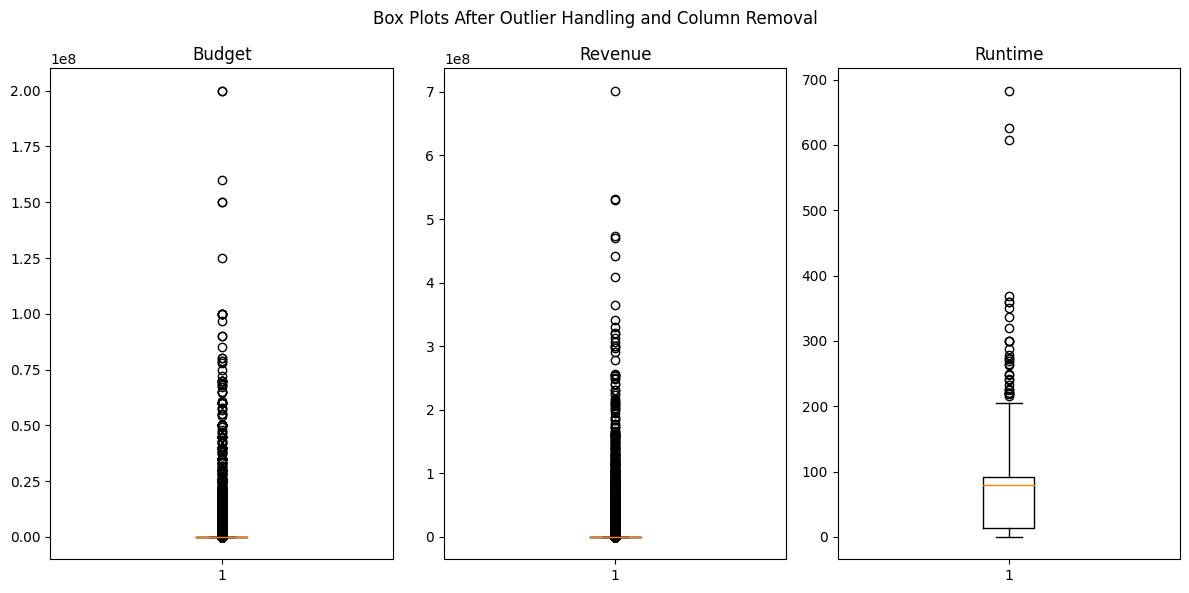

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].boxplot(budget)
axes[0].set_title("Budget")

axes[1].boxplot(revenue)
axes[1].set_title("Revenue")

axes[2].boxplot(runtime)
axes[2].set_title("Runtime")

fig.suptitle("Box Plots After Outlier Handling and Column Removal")

plt.tight_layout()

plt.show()

<h2>Analysis of Profit</h2>
<p>In this dataset, which explores the profitability of horror films, the provided statistics offer crucial insights into the financial performance of these movies. It's important to note that the "profit" values were derived by subtracting the budget from the revenue for each film, with all figures represented in US dollars (USD). The "count" value of 1,073 indicates the number of valid data points in the dataset, suggesting a substantial sample size for analysis. The "mean" or average profit, approximately 26.5 million USD, reflects the central tendency of the data. Notably, the "standard deviation" of approximately 60.3 million USD highlights the considerable variability in profitability among horror films. The presence of a negative "minimum" value (-194.8 million USD) indicates instances of financial losses, which is not uncommon in the film industry. The quartiles (25th, 50th, and 75th percentiles) provide valuable insights into the distribution of profits, with the median (50th percentile) profit at 3.4 million USD, indicating the midpoint of the data. Lastly, the "maximum" value of 666.8 million USD represents the highest recorded profit, showcasing the potential for significant financial success in the horror film genre. These statistics collectively provide an overview of the profitability landscape within the horror film industry, offering a foundation for more in-depth analysis and insights.</p>

In [191]:
horror_films_df['profit'] = revenue - budget
profit = horror_films_df['profit']
profit.describe()

count    1.073000e+03
mean     2.647533e+07
std      6.033079e+07
min     -1.947758e+08
25%     -1.832220e+05
50%      3.400000e+06
75%      2.987041e+07
max      6.668426e+08
Name: profit, dtype: float64

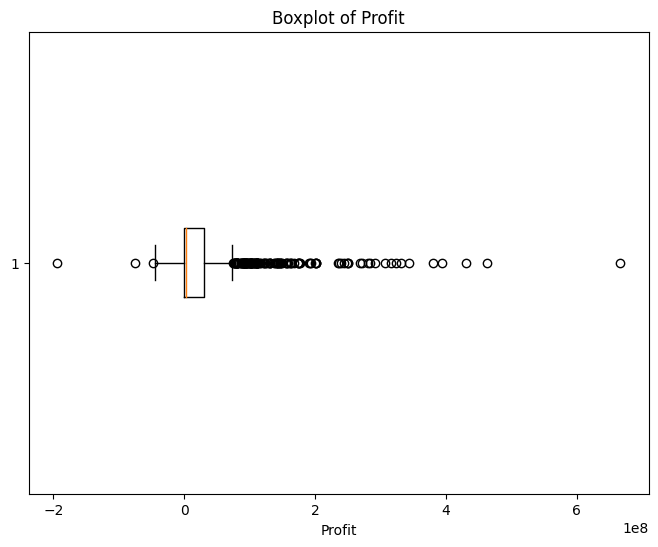

In [192]:
plt.figure(figsize=(8, 6))
plt.boxplot(profit, vert=False)  
plt.title('Boxplot of Profit')
plt.xlabel('Profit')
plt.show()

<h2>Analysis of Text Data</h2>
<p>
In our data science project, we delve into the rich landscape of text data present in our dataset. Among the numerous columns housing textual information, we've identified specific columns that warrant our focused attention: "original_language," "release_date," "adult," "genre_names," and "status." These columns hold key textual attributes that are integral to our analysis and provide valuable context to our dataset. However, we acknowledge that some columns containing text data do not contribute directly to our research objectives. Therefore, columns such as "summaries," "links to posters," and others housing non-relevant information will be omitted from our dataset. This selective approach ensures that our analysis remains centered on the most pertinent textual data, enabling us to extract meaningful insights and drive informed decision-making in our project.</p>

In [193]:
#removing columns with unnescessary information
horror_films_df.drop(['overview', 'tagline', 'poster_path', 'backdrop_path'], axis=1)

,id,original_title,title,original_language,release_date,vote_count,vote_average,budget,revenue,runtime,status,adult,genre_names,collection,collection_name,profit
2,882598,Smile,Smile,en,2022-09-23,114,6.8,17000000,45000000,115,Released,False,"Horror, Mystery, Thriller",NaN,NaN,28000000
3,756999,The Black Phone,The Black Phone,en,2022-06-22,2736,7.9,18800000,161000000,103,Released,False,"Horror, Thriller",NaN,NaN,142200000
6,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,2022-09-15,125,5.8,20000000,2892594,88,Released,False,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection,-17107406
7,762504,Nope,Nope,en,2022-07-20,1684,7.0,68000000,170800000,130,Released,False,"Horror, Mystery, Science Fiction, Thriller",NaN,NaN,102800000
9,760104,X,X,en,2022-03-17,1035,6.8,10000000,14257609,106,Released,False,"Horror, Mystery, Thriller",950289.0,X Collection,4257609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31902,985611,Cycle,Cycle,en,2021-04-18,0,0.0,10,10,3,Released,False,"Drama, Horror, Thriller",NaN,NaN,0
31955,988476,Willowpede,Willowpede,en,2020-01-03,3,10.0,5000,500,11,Released,False,Horror,NaN,NaN,-4500
32382,1020263,I,I,en,2021-09-09,1,10.0,1,2,1,Released,False,"Horror, Mystery",NaN,NaN,1
32383,1020264,II,II,en,2021-09-09,1,10.0,1,2,2,Released,False,"Horror, Mystery",NaN,NaN,1


<h2>Original Language Analysis</h2>
<p>In our analysis of the original languages of films within our dataset, we discovered a diverse linguistic landscape encompassing a total of 30 different languages. English emerged as the predominant language, boasting a substantial presence with 934 entries, accounting for a significant proportion of 87.0% of the dataset. Intrigued by the diversity of languages, we delved deeper into the non-English films, leading us to create a separate dataset exclusively dedicated to this subset. Within this subset, we uncovered the top five most common non-English languages. Japanese claimed a notable position with 24 films, constituting 17.3% of the non-English dataset, followed closely by Spanish and Hindi, each with 19 films, representing 13.7% of the non-English dataset. Korean followed with 14 films, amounting to 10.1%, and French with 12 films, comprising 8.6% of the non-English dataset. This exploration not only highlighted the prevalence of English but also shed light on the richness of other languages, providing valuable insights into the international diversity of films within our dataset.</p>

In [194]:
original_language = horror_films_df['original_language']

In [195]:
original_language.unique()

array(['en', 'fr', 'ko', 'es', 'ja', 'th', 'fi', 'ru', 'nb', 'no', 'it',
       'sv', 'cn', 'tr', 'pl', 'de', 'zh', 'hi', 'ml', 'te', 'ta', 'kn',
       'tl', 'ms', 'ur', 'km', 'fa', 'bn', 'ar', 'pt'], dtype=object)

In [196]:
len(original_language.unique())

30

In [197]:
original_language.value_counts()

original_language
en    934
ja     24
es     19
hi     19
ko     14
fr     12
it      7
de      6
ru      5
th      4
tl      3
tr      3
ta      3
te      2
cn      2
no      2
ar      1
bn      1
fa      1
km      1
ur      1
ms      1
nb      1
kn      1
ml      1
zh      1
fi      1
pl      1
sv      1
pt      1
Name: count, dtype: int64

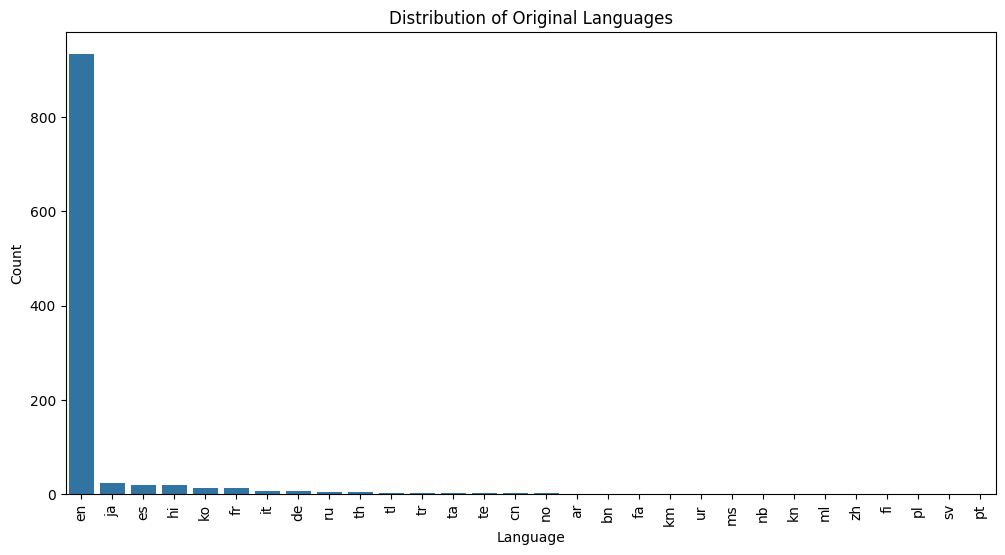

In [198]:

plt.figure(figsize=(12, 6))
sns.countplot(data= horror_films_df, x='original_language', order=horror_films_df['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

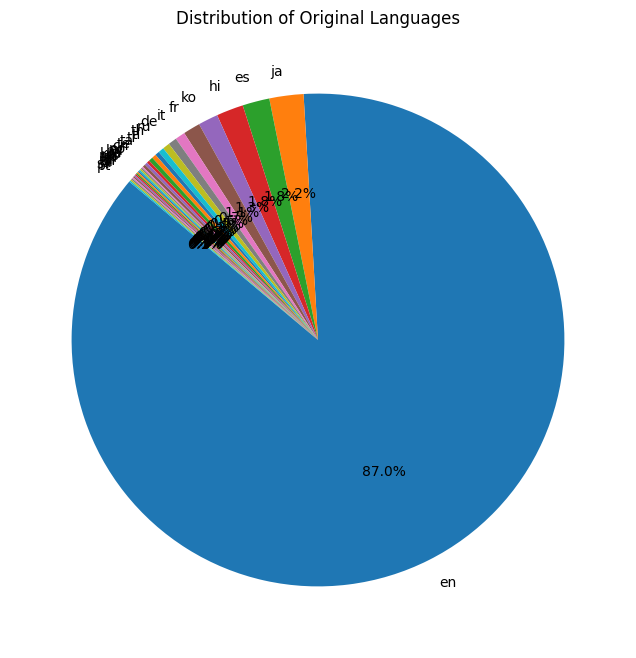

In [199]:
language_counts = horror_films_df['original_language'].value_counts()
labels = language_counts.index
sizes = language_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Original Languages')
plt.show()

In [200]:
columns_to_check = ['original_language']

for column in columns_to_check:
    horror_films_non_en_df = horror_films_df[horror_films_df[column] != 'en']

horror_films_non_en_df.to_csv('horror_films_non_en.csv', sep=',')

In [201]:
horror_films_non_en_df['original_language'].value_counts()

original_language
ja    24
es    19
hi    19
ko    14
fr    12
it     7
de     6
ru     5
th     4
tl     3
tr     3
ta     3
te     2
cn     2
no     2
ar     1
bn     1
fa     1
km     1
ur     1
ms     1
nb     1
kn     1
ml     1
zh     1
fi     1
pl     1
sv     1
pt     1
Name: count, dtype: int64

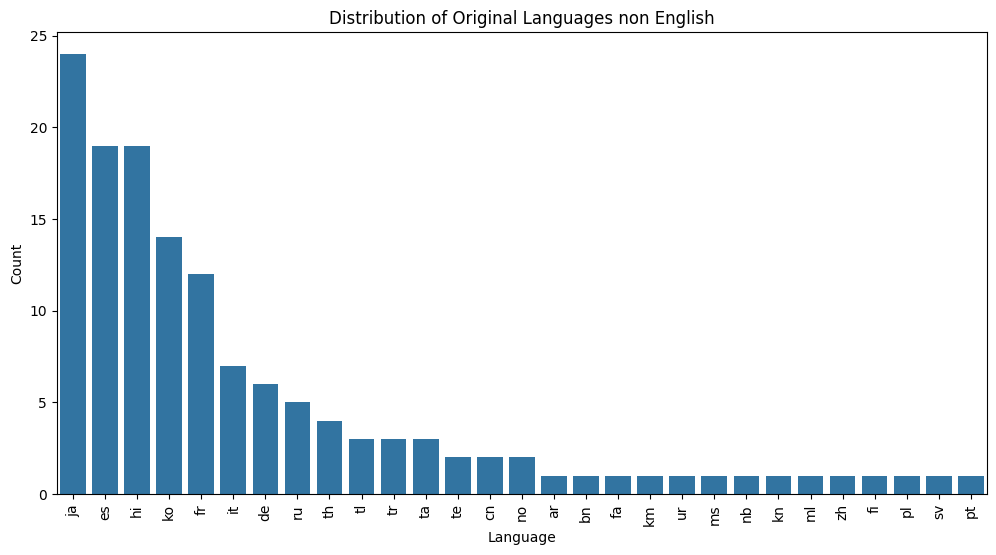

In [202]:
plt.figure(figsize=(12, 6))
sns.countplot(data= horror_films_non_en_df, x='original_language', order=horror_films_non_en_df['original_language'].value_counts().index)
plt.title('Distribution of Original Languages non English')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

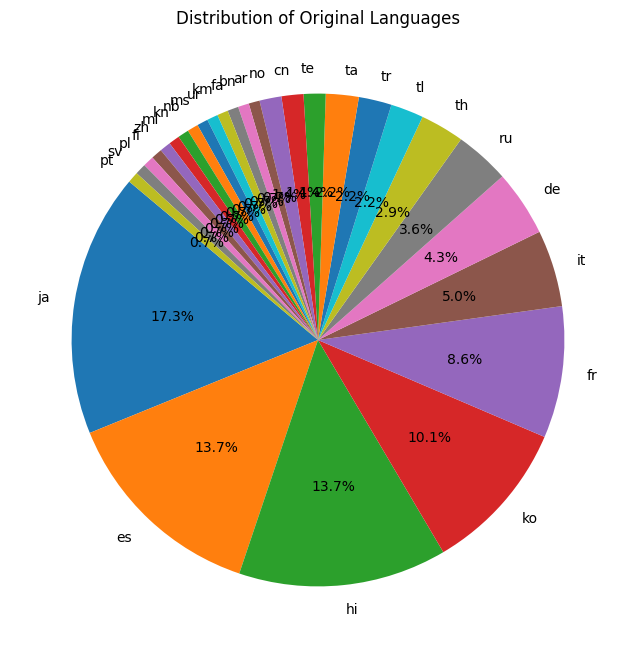

In [203]:
language_counts = horror_films_non_en_df['original_language'].value_counts()
labels = language_counts.index
sizes = language_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Original Languages')
plt.show()

<h1>Analysis of Release Date</h1>

<p>In our analysis of release dates within our horror film dataset, we began by transforming the 'release_date' column into a datetime format using Pandas' .to_datetime() method. This allowed us to work with date-related data more effectively. To facilitate our analysis, we created three new columns: 'release_year,' 'release_month,' and 'release_day.' However, after careful consideration, we opted not to delve further into the 'release_day' column, as it appeared less likely to reveal meaningful insights.</p>

<p>Turning our attention to 'release_year,' we uncovered a range of film releases spanning from 1953 to 2022. To gain a holistic view of the data, we segmented the years into decades and visualized the distribution through a histogram. This analysis revealed that the decade with the highest number of films in our dataset was 2010-2019. It is noteworthy that, over time, there has been a gradual increase in the production of horror films, potentially reflecting increased resources and activity in the genre. An interesting anomaly is observed in the 2020-2029 decade, with a lower film count; however, as of our analysis in 2023, there are still several years left in this decade, potentially explaining the lower count.</p>

<p>Moving on to the analysis of release months, we found October to be the month with the highest number of horror film releases, boasting 157 entries in our dataset. The months leading up to October, namely August and September, secured the 3rd and 2nd positions, respectively. This pattern suggests anticipation building up to Halloween, a season known for heightened interest in horror films. Conversely, December had the lowest number of releases, possibly due to the holiday season and Christmas taking precedence in the film industry.</p>

<p>Throughout our analysis, we encountered no issues related to outliers or erroneous data entries in the release date column. This comprehensive examination of release dates provides valuable insights into the temporal distribution of horror films within our dataset.</p>

In [204]:
#convert the object in release date into a datetime using the to_datetime function
horror_films_df['release_date'] = pd.to_datetime(horror_films_df['release_date'])

In [205]:
#creating 3 new columns 'release_year', release_month, and 'release_day
horror_films_df['release_year'] = horror_films_df['release_date'].dt.year
horror_films_df['release_month'] = horror_films_df['release_date'].dt.month
horror_films_df['release_day'] = horror_films_df['release_date'].dt.day

In [206]:
unique_release_years = horror_films_df['release_year'].unique()
sorted_release_years = sorted(unique_release_years, reverse = True)
formatted_release_years = '\n'.join(map(str, sorted_release_years))
print(formatted_release_years)

2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1968
1967
1966
1964
1963
1962
1961
1960
1959
1958
1957
1956
1955
1954
1953


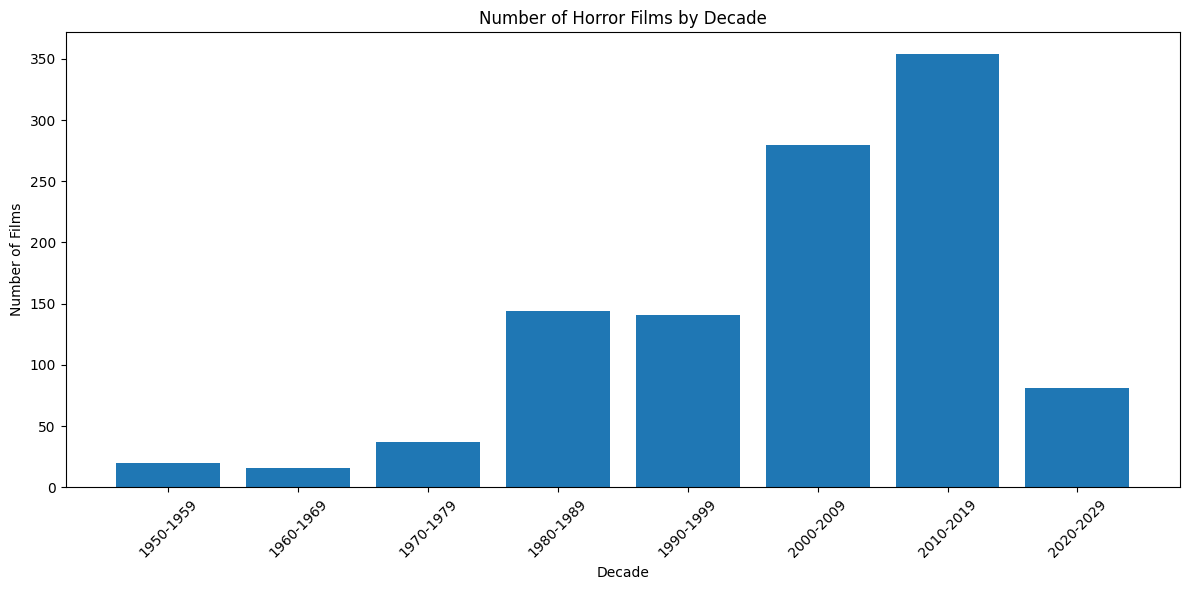

In [207]:
year_counts = horror_films_df['release_year'].value_counts()
sorted_year_counts = year_counts.sort_index(ascending=False)
formatted_year_counts = [f"{year}: {count}" for year, count in zip(sorted_year_counts.index, sorted_year_counts)]
decades = [(f"{decade}-{decade+9}", sorted_year_counts[(sorted_year_counts.index >= decade) & (sorted_year_counts.index < decade+10)].sum()) for decade in range(1950, 2030, 10)]
decade_labels, decade_counts = zip(*decades)
# Create the histogram
plt.figure(figsize=(12, 6))
plt.bar(decade_labels, decade_counts)
plt.title('Number of Horror Films by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



release_month
1      85
2      70
3      69
4      83
5      85
6      90
7      79
8     103
9     128
10    157
11     77
12     47
Name: count, dtype: int64


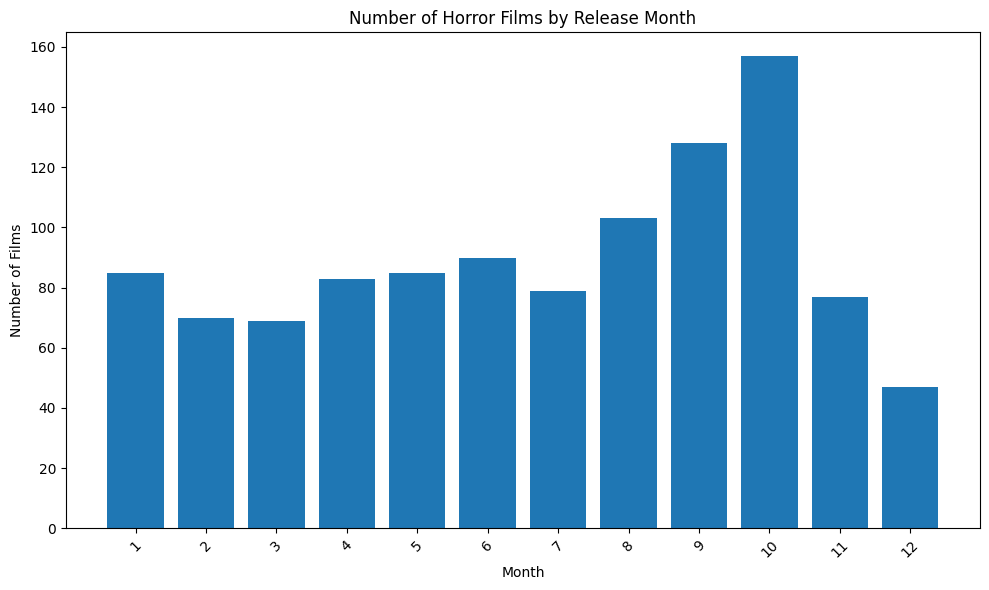

In [208]:
month_counts = horror_films_df['release_month'].value_counts()
sorted_month_counts = month_counts.sort_index(ascending=True)
print(sorted_month_counts)
months = sorted_month_counts.index
counts = sorted_month_counts.values

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(months, counts)
plt.title('Number of Horror Films by Release Month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.xticks(months, rotation=45)  # Use month names as x-axis labels
plt.tight_layout()
plt.show()

<h1>Analysis of Status and Adult</h1>
<p>We conducted a brief examination of the 'status' and 'adult' columns in our dataset, which revealed a lack of diversity in these columns, with only a single unique value present in each. Recognizing that these columns would not contribute meaningful insights to our analysis, we made the decision to remove them from our dataset to streamline our focus on more relevant features.</p>

In [209]:
status = horror_films_df['status']
status.unique()

array(['Released'], dtype=object)

In [210]:
adult = horror_films_df['adult']
adult.unique()

array([False])

In [211]:
#dropping the 'status' and 'adult' columns.
horror_films_df = horror_films_df.drop(['status', 'adult'], axis=1)

<h2>Analysis of Genre Names</h2>
<p>In our exploration of the dataset, we began by delving into the 'genre_names' column, which contained strings separated by commas. To facilitate easier manipulation, we converted these strings into lists. Subsequently, we introduced a new column named 'other_genres' as we focused on the sub-genres within the realm of horror films. This analysis unveiled a fascinating array of 18 unique sub-genres, including 'Drama,' 'Romance,' 'Adventure,' and others. To discern the most prevalent sub-genres, we conducted a value count, revealing the top five as Thriller, Mystery, Science Fiction, Comedy, and Drama. Notably, there were 149 instances of 'None' in the sub-genre category, signifying films categorized solely as 'horror' without additional genres. It's important to acknowledge that the count of sub-genres exceeds the number of films, as several films encompassed multiple sub-genres. These findings will serve as valuable insights in our project, as we seek correlations to unravel the elements contributing to the success of horror films.</p>

In [212]:
#See a sample to analyse data type
sample_genre_names = horror_films_df['genre_names'].sample(10)
print(sample_genre_names)

2166                        Action, Horror
628                         Comedy, Horror
1314      Crime, Horror, Mystery, Thriller
1535       Comedy, Horror, Science Fiction
3247               Crime, Horror, Thriller
20352                               Horror
442                       Horror, Thriller
6424               Drama, Horror, Thriller
1003     Action, Fantasy, Horror, Thriller
1009                         Drama, Horror
Name: genre_names, dtype: object


In [213]:
# Convert the comma-separated strings to lists
horror_films_df['genre_names'] = horror_films_df['genre_names'].str.split(', ')

# Display the first few rows to verify the conversion
print(horror_films_df['genre_names'].head())

2                     [Horror, Mystery, Thriller]
3                              [Horror, Thriller]
6                     [Horror, Mystery, Thriller]
7    [Horror, Mystery, Science Fiction, Thriller]
9                     [Horror, Mystery, Thriller]
Name: genre_names, dtype: object


In [214]:
# Create a new column 'other_genres' with the genres other than 'Horror'
horror_films_df['other_genres'] = horror_films_df['genre_names'].apply(lambda genre_list: [genre for genre in genre_list if genre != 'Horror'])

# Replace empty lists (films that only have 'Horror') with None in the 'other_genres' column
horror_films_df['other_genres'] = horror_films_df['other_genres'].apply(lambda genre_list: None if len(genre_list) == 0 else genre_list)

# Display the DataFrame to verify the changes
print(horror_films_df[['genre_names', 'other_genres']].head())

                                    genre_names  \
2                   [Horror, Mystery, Thriller]   
3                            [Horror, Thriller]   
6                   [Horror, Mystery, Thriller]   
7  [Horror, Mystery, Science Fiction, Thriller]   
9                   [Horror, Mystery, Thriller]   

                           other_genres  
2                   [Mystery, Thriller]  
3                            [Thriller]  
6                   [Mystery, Thriller]  
7  [Mystery, Science Fiction, Thriller]  
9                   [Mystery, Thriller]  


In [215]:
# Flatten the lists in the 'other_genres' column and convert them to a single list
all_genres = [genre for sublist in horror_films_df['other_genres'].dropna() for genre in sublist]

# Use set to find unique elements
unique_genres = set(all_genres)

# Get the count of unique genres
num_unique_genres = len(unique_genres)

# Display the count and unique genres
print("Number of unique genres:", num_unique_genres)
print("Unique genres:", unique_genres)

Number of unique genres: 18
Unique genres: {'Drama', 'Romance', 'Adventure', 'History', 'TV Movie', 'Crime', 'Western', 'War', 'Comedy', 'Mystery', 'Thriller', 'Science Fiction', 'Fantasy', 'Animation', 'Documentary', 'Family', 'Action', 'Music'}


In [216]:
# Flatten the lists in the 'other_genres' column and convert them to a single list
all_genres = [genre for sublist in horror_films_df['other_genres'].dropna() for genre in sublist]

# Calculate the counts of each sub-genre
genre_counts = pd.Series(all_genres).value_counts()

# Count the 'None' values
none_count = horror_films_df['other_genres'].isna().sum()

# Display the counts of sub-genres and 'None'
print("Counts of sub-genres:")
print(genre_counts)

print("\nNumber of 'None' values:", none_count)

Counts of sub-genres:
Thriller           519
Mystery            235
Science Fiction    200
Comedy             162
Drama              157
Action             126
Fantasy            122
Crime               61
Adventure           44
Romance             24
Music                7
Animation            6
Family               4
History              4
War                  3
Western              2
Documentary          2
TV Movie             1
Name: count, dtype: int64

Number of 'None' values: 149


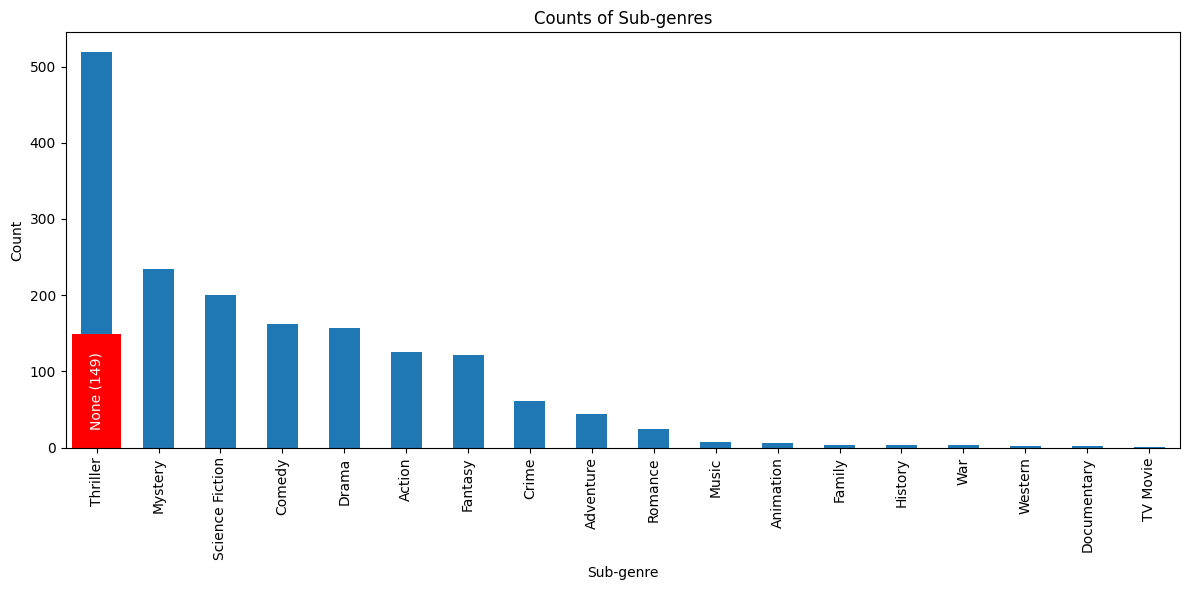

In [217]:
# Create a bar plot for sub-genre counts
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Counts of Sub-genres')
plt.xlabel('Sub-genre')
plt.ylabel('Count')

# Add a bar for 'None' values
plt.bar('None', none_count, color='red')

# Calculate the x and y coordinates for the text annotation
x_coord = 'None'
y_coord = none_count / 2  # Adjust the y-coordinate for placement inside the red bar

# Add a text annotation inside the red bar with 90-degree rotation
plt.text(x_coord, y_coord, f'None ({none_count})', ha='center', va='center', color='white', rotation=90)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h2>Analysis of Collections</h2>
<p>In our exploration of the dataset, we embarked on a quest to uncover insights about films that were part of collections. A count revealed the presence of 398 entries falling into this category. To facilitate in-depth analysis for future research, we created a new DataFrame aptly named 'grouped collections.' Within this new dataset, films were meticulously grouped by collection name, and, within each group, they were thoughtfully sorted by release year. However, our scrutiny uncovered a notable observation: some films were marked as part of collections, yet there was only one film present in those collections. This intriguing discovery raised questions about whether these were standalone collections or if certain films had been removed during earlier data cleaning phases. To investigate further, we filtered out films that appeared only once in their respective collections, leaving us with 279 films spread across 99 unique collections. Among these, the five most prominent collections were the 'Friday the 13th Collection' with 11 films, 'Halloween Collection' with 10 films, 'Saw Collection' with 8 films, 'A Nightmare on Elm Street Collection' with 7 films, and 'Child's Play Collection' also with 7 films. This dataset will serve as a valuable resource for analyzing the relative success or lack thereof among different installments within these collections</p>

In [218]:
collection_name = horror_films_df['collection_name']

In [219]:
number_of_collections = collection_name.count()
print(f"The count of entries in this dataset that are indicated as part of a collection is: {number_of_collections}")

The count of entries in this dataset that are indicated as part of a collection is: 398


In [220]:
# Filter the DataFrame to exclude rows where 'collection_name' is null
filtered_df = horror_films_df.dropna(subset=['collection_name'])

# Group the filtered DataFrame by 'collection_name' and sort within each group by 'release_year'
grouped_and_sorted = filtered_df.sort_values(by=['collection_name', 'release_year']).groupby('collection_name')

# Create a new DataFrame with the grouped and sorted data
new_dataframe = grouped_and_sorted.apply(lambda x: x)

# Save the new DataFrame to a CSV file
new_dataframe.to_csv('grouped_collections.csv', index=False)

In [221]:
grouped_and_sorted.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,vote_count,vote_average,...,runtime,backdrop_path,genre_names,collection,collection_name,profit,release_year,release_month,release_day,other_genres
307,170,28 Days Later,28 Days Later,en,Twenty-eight days after a killer virus was acc...,His fear began when he woke up alone. His terr...,2002-10-31,/sQckQRt17VaWbo39GIu0TMOiszq.jpg,5557,7.2,...,113,/veUl0QT8swshQ9Dz0fQ1k6ZkthD.jpg,"[Horror, Science Fiction, Thriller]",1565.0,28 Days/Weeks Later Collection,80720385,2002,10,31,"[Science Fiction, Thriller]"
269,1562,28 Weeks Later,28 Weeks Later,en,The inhabitants of the British Isles have lost...,When days turn to weeks... the horror returns.,2007-04-26,/ja8nzgtzhJq0vtX3BJcnbceIxCF.jpg,3514,6.6,...,100,/PN7yjmQdmG0J62jsrtmrPi8ezK.jpg,"[Horror, Science Fiction, Thriller]",1565.0,28 Days/Weeks Later Collection,50048678,2007,4,26,"[Science Fiction, Thriller]"
586,4513,30 Days of Night,30 Days of Night,en,This is the story of an isolated Alaskan town ...,They're Coming!,2007-10-17,/goHX48AYgfsKhNYnbgC92YF9URL.jpg,2267,6.4,...,113,/w8VDpCcKezdBbXJEWMHwttI35mU.jpg,"[Horror, Thriller]",91660.0,30 Days of Night Collection,45505973,2007,10,17,[Thriller]
593,403119,47 Meters Down,47 Meters Down,en,Two sisters on Mexican vacation are trapped in...,No way out. No way up. No chance in hell.,2017-05-25,/lMcsEOcd6crzfF0pjsGkO5Pq01t.jpg,2406,5.8,...,89,/6j8B3BqTuNrpAJoa0JIc7nZzOUn.jpg,"[Adventure, Drama, Horror, Thriller]",635922.0,47 Meters Down Collection,38735023,2017,5,25,"[Adventure, Drama, Thriller]"
103,139038,A Haunted House,A Haunted House,en,"Malcolm and Kisha move into their dream home, ...",This $*%! ain't paranormal.,2013-01-11,/skQt53YE2iyOftXj5afJkHmYxLW.jpg,1499,5.8,...,86,/akKBMXHEesqfuoYFt7LaRptFAO0.jpg,"[Comedy, Horror]",251937.0,A Haunted House Collection,57641683,2013,1,11,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,338967,Zombieland: Double Tap,Zombieland: Double Tap,en,"Columbus, Tallahassee, Wichita, and Little Roc...",NaN,2019-10-09,/ayds6ZnMCEhgtoDbm0EVtYmzyzk.jpg,4691,7.0,...,99,/e7tMI0zVKJB2TS74TaBifIZIkCp.jpg,"[Comedy, Horror]",537982.0,Zombieland Collection,80801777,2019,10,9,[Comedy]
182,8329,[REC],[REC],es,A television reporter and cameraman follow eme...,One witness. One camera,2007-11-23,/5XsVGgo8I12v3KlPcD0r1CNHMC6.jpg,3576,7.2,...,78,/sYZPRfv7OvtS8KOvZ5OojOaiI7F.jpg,"[Horror, Mystery]",74508.0,[REC] Collection,31011655,2007,11,23,[Mystery]
446,10664,[REC]²,[REC]²,es,"The action continues from [REC], with the medi...",Fear Revisited,2009-09-15,/gWmIqmhb6B6bmL6EPX4sVx0jO02.jpg,1652,6.6,...,85,/svZPLmBwYHjlwDwHkZz4EotpXqx.jpg,"[Horror, Thriller]",74508.0,[REC] Collection,12869680,2009,9,15,[Thriller]
344,80280,[REC]³ Génesis,[REC]³ Genesis,es,A pair of newlyweds must fight to survive when...,You may kiss the bride.,2012-03-30,/tI1534q0Up7PBcLdXdFerLmIXn3.jpg,1221,5.2,...,80,/zw2fVaoOajJc5wcbESvAUsCXimU.jpg,[Horror],74508.0,[REC] Collection,4619975,2012,3,30,None


In [222]:
# Reset the index to avoid ambiguity
new_dataframe = new_dataframe.reset_index(drop=True)

# Group the new DataFrame by 'collection_name' and filter out groups with only one entry
filtered_dataframe = new_dataframe.groupby('collection_name').filter(lambda group: len(group) > 1)

# Save the filtered DataFrame to a CSV file
filtered_dataframe.to_csv('filtered_collections.csv', index=False)

In [223]:
filtered_dataframe.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,vote_count,vote_average,...,runtime,backdrop_path,genre_names,collection,collection_name,profit,release_year,release_month,release_day,other_genres
0,170,28 Days Later,28 Days Later,en,Twenty-eight days after a killer virus was acc...,His fear began when he woke up alone. His terr...,2002-10-31,/sQckQRt17VaWbo39GIu0TMOiszq.jpg,5557,7.2,...,113,/veUl0QT8swshQ9Dz0fQ1k6ZkthD.jpg,"[Horror, Science Fiction, Thriller]",1565.0,28 Days/Weeks Later Collection,80720385,2002,10,31,"[Science Fiction, Thriller]"
1,1562,28 Weeks Later,28 Weeks Later,en,The inhabitants of the British Isles have lost...,When days turn to weeks... the horror returns.,2007-04-26,/ja8nzgtzhJq0vtX3BJcnbceIxCF.jpg,3514,6.6,...,100,/PN7yjmQdmG0J62jsrtmrPi8ezK.jpg,"[Horror, Science Fiction, Thriller]",1565.0,28 Days/Weeks Later Collection,50048678,2007,4,26,"[Science Fiction, Thriller]"
4,139038,A Haunted House,A Haunted House,en,"Malcolm and Kisha move into their dream home, ...",This $*%! ain't paranormal.,2013-01-11,/skQt53YE2iyOftXj5afJkHmYxLW.jpg,1499,5.8,...,86,/akKBMXHEesqfuoYFt7LaRptFAO0.jpg,"[Comedy, Horror]",251937.0,A Haunted House Collection,57641683,2013,1,11,[Comedy]
5,184345,A Haunted House 2,A Haunted House 2,en,"After exorcising the demons of his ex-, Malcol...",It'll scare the #2 out of you.,2014-04-17,/oV7M00fPXy5P0nbdeMbSUjYv0vx.jpg,1126,6.0,...,87,/6gycezbvc8iHSune1Evq79dcYIY.jpg,"[Comedy, Horror]",251937.0,A Haunted House Collection,21343661,2014,4,17,[Comedy]
6,377,A Nightmare on Elm Street,A Nightmare on Elm Street,en,Teenagers in a small town are dropping like fl...,"If Nancy Doesn't Wake Up Screaming, She Won't ...",1984-11-09,/wGTpGGRMZmyFCcrY2YoxVTIBlli.jpg,4150,7.3,...,91,/g9ROrZey0JYp7kf8DoAyZtKnObj.jpg,[Horror],8581.0,A Nightmare on Elm Street Collection,23885134,1984,11,9,None


In [224]:
filtered_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 397
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 279 non-null    int64         
 1   original_title     279 non-null    object        
 2   title              279 non-null    object        
 3   original_language  279 non-null    object        
 4   overview           279 non-null    object        
 5   tagline            267 non-null    object        
 6   release_date       279 non-null    datetime64[ns]
 7   poster_path        279 non-null    object        
 8   vote_count         279 non-null    int64         
 9   vote_average       279 non-null    float64       
 10  budget             279 non-null    int64         
 11  revenue            279 non-null    int64         
 12  runtime            279 non-null    int64         
 13  backdrop_path      274 non-null    object        
 14  genre_names    

In [225]:
filtered_dataframe['collection_name'].unique()

array(['28 Days/Weeks Later Collection', 'A Haunted House Collection',
       'A Nightmare on Elm Street Collection', 'A Quiet Place Collection',
       'AVP Collection', 'Alien Collection',
       'An American Werewolf Collection', 'Annabelle Collection',
       'Bad Ben Collection', 'Bhoot Collection', 'Blade Collection',
       'Blair Witch Collection', 'BloodRayne Collection',
       'Boogeyman Collection', 'C.H.U.D. Collection',
       'Candyman Collection', 'Carrie Collection',
       "Child's Play Collection", 'Children of the Corn Collection',
       'Creepshow Collection', 'Critters Collection',
       'Deadlands Collection', "Don't Breathe Collection",
       'Dracula (Hammer) Collection', 'Escape Room Collection',
       'Evil Dead Collection', 'Final Destination Collection',
       'Firefly Collection', 'Friday the 13th Collection',
       'From Dusk Till Dawn Collection', 'Gamera (Heisei) Collection',
       'Godzilla (Heisei) Collection', 'Godzilla (Showa) Collection',
  

In [226]:
filtered_dataframe['collection_name'].value_counts()

collection_name
Friday the 13th Collection                  11
Halloween Collection                        10
Saw Collection                               8
A Nightmare on Elm Street Collection         7
Child's Play Collection                      7
                                            ..
Happy Death Day Collection                   2
Halloween (Rob Zombie Series) Collection     2
Goosebumps Collection                        2
Godzilla (Showa) Collection                  2
Ouija Collection                             2
Name: count, Length: 99, dtype: int64

<h2>Next Steps in our Analysis</h2>
<p>With our initial dataset now thoroughly analyzed and preprocessed, we stand ready to delve into deeper investigations. Our journey ahead is guided by a series of thought-provoking questions aimed at unraveling the secrets of what contributes to the success of a horror film. These questions will serve as the compass for our upcoming research:</p>

<p>a. How should we accurately measure a horror film's success? Should it be gauged solely by profit, or should we consider the average rating from viewers as well? And, is there any intriguing correlation between these two metrics?</p>

<p>b. What role does the budget play in determining a film's success? Are high-budget productions inherently more likely to achieve success, or does the relationship prove more complex?</p>

<p>c. Does a film's language influence its level of success? We intend to explore which foreign language films have the potential to rise to prominence on the international stage.</p>

<p>d. In which decade did horror films experience their zenith in terms of success? Will our analysis reveal trends indicating whether films have improved or declined over time?</p>

<p>e. Is there an optimal time of year for releasing a horror film that correlates with higher success rates? The tradition of releasing horror films leading up to Halloween intrigues us—does it indeed play a significant role in a film's success?</p>

<p>f. Might there exist a correlation between a horror film's sub-genre and its success? If so, which sub-genres are more likely to emerge as successful contenders?</p>

<p>g. We're also set to investigate whether films belonging to collections tend to enjoy greater success than stand-alone films. Within these collections, are there intriguing trends regarding the success of later installments? Do they continue to build in popularity, or do they experience a decline in viewer appeal?</p>

<p>With these questions in our toolkit, we embark on a compelling journey to unlock the mysteries behind the formula for a successful horror film."</p>

<h2>Profit vs Rating</h2>
<p>In our analysis, we delved into the intriguing relationship between a film's profit and its average voting rating. Initially, we attempted to visualize this connection through a scatter plot, but the sheer volume of data points obscured any discernible patterns. To enhance the clarity of our analysis, we took a sample of 300 data points for a closer examination. Nevertheless, the presence of anomalies at the high end of the spectrum skewed our results. To mitigate this, we implemented a filter, focusing solely on films with ratings below 8, a move we believed would eliminate these outliers. With the filtered data, we proceeded to plot a polynomial regression line and calculated the R-squared (R2) score, which yielded a value of 0.12. This result indicates a weak correlation between film rating and profit. While it suggests that films with higher profits tend to enjoy higher ratings to some extent, we must bear in mind that numerous other factors could influence both variables. As a result, we've decided to use both profit and average voting rating independently as metrics for evaluating a film's success. This dual approach allows us to explore financial success and reception success, recognizing the multifaceted nature of a film's performance.</p>

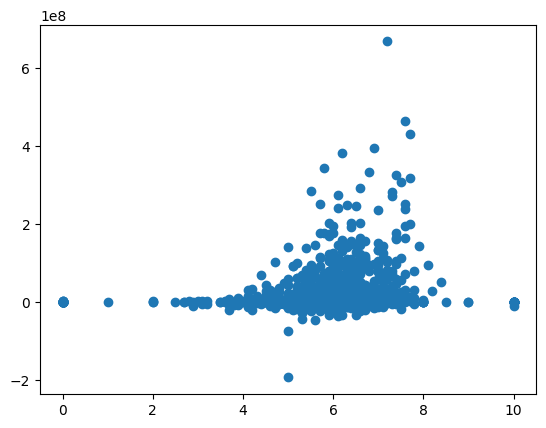

In [227]:
x_axis = horror_films_df['vote_average']
y_axis = horror_films_df['profit']

plt.scatter(x_axis, y_axis)
plt.show()

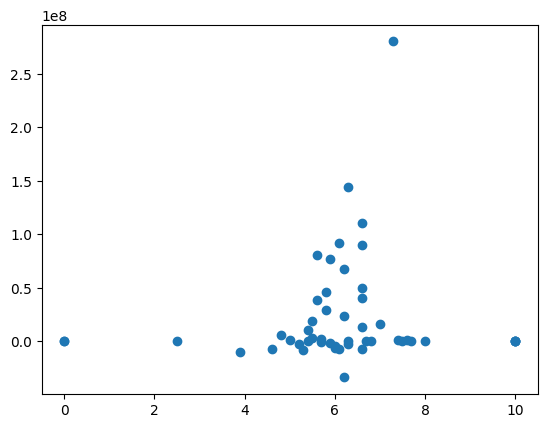

In [228]:
sampled_data = horror_films_df.sample(n=50)  # Adjust the 'n' value as needed

x_axis = sampled_data['vote_average']
y_axis = sampled_data['profit']

plt.scatter(x_axis, y_axis)
plt.show()

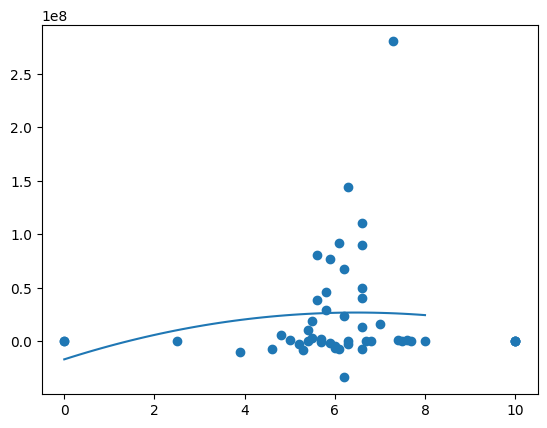

In [229]:
polynm_model = np.poly1d(np.polyfit(x_axis, y_axis, 2))
my_line = np.linspace(0,8,50)

plt.scatter(x_axis,y_axis)
plt.plot(my_line,polynm_model(my_line))
plt.show()

In [230]:

columns_to_check = ['vote_average']

for column in columns_to_check:
    profit_vs_rating_filter_df = horror_films_df[horror_films_df[column] < 8]

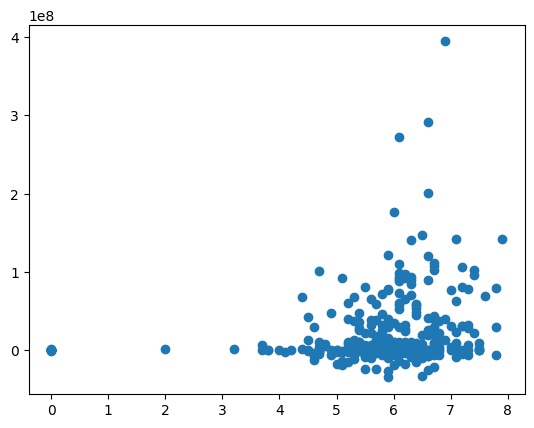

In [231]:
sampled_data = profit_vs_rating_filter_df.sample(n=300)  # Adjust the 'n' value as needed

x_axis = sampled_data['vote_average']
y_axis = sampled_data['profit']

plt.scatter(x_axis, y_axis)
plt.show()

R-squared (R2) score: 0.06


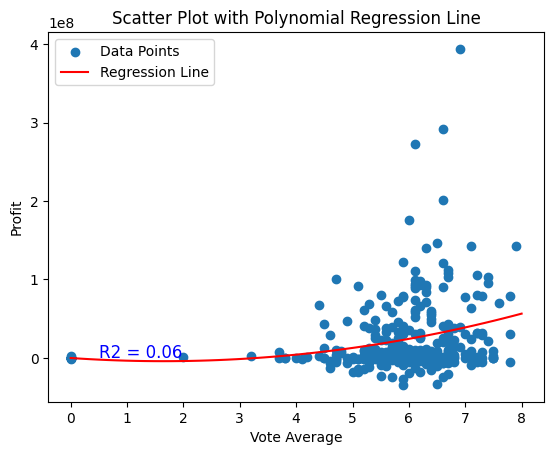

In [232]:

polynm_model = np.poly1d(np.polyfit(x_axis, y_axis, 2))
my_line = np.linspace(0,8,50)

plt.scatter(x_axis, y_axis, label='Data Points')

# Plot the regression line in red
plt.plot(my_line, polynm_model(my_line), 'r', label='Regression Line')

# Add a title and labels for the x and y axes
plt.title('Scatter Plot with Polynomial Regression Line')
plt.xlabel('Vote Average')
plt.ylabel('Profit')

# Calculate the R-squared score
y_pred = polynm_model(x_axis)
r2 = r2_score(y_axis, y_pred)
print(f'R-squared (R2) score: {r2:.2f}')

# Add the R-squared score as text on the plot
plt.text(0.5, 7, f'R2 = {r2:.2f}', fontsize=12, color='blue')

# Add a legend to distinguish between data points and the regression line
plt.legend()

plt.show()

<h2>How does the budget influence a films success</h2>

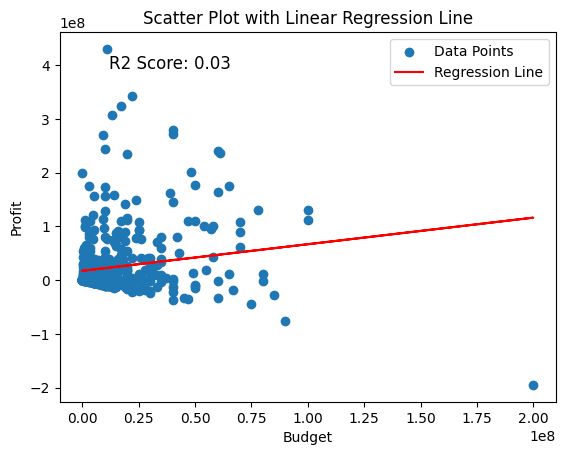

In [234]:
from scipy import stats

sampled_data = horror_films_df.sample(n=500)  # Adjust the 'n' value as needed

x_axis = sampled_data['budget']
y_axis = sampled_data['profit']

slope, intercept, r, p, std_err = stats.linregress(x_axis, y_axis)

def regression_func(x_axis):
    return slope * x_axis + intercept

model = list(map(regression_func, x_axis))

plt.scatter(x_axis, y_axis, label='Data Points')
plt.plot(x_axis, model, 'r', label='Regression Line')

# Add the R-squared (R2) score as text on the graph
r_squared = r**2
plt.text(0.1, 0.9, f'R2 Score: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add a title and labels for the x and y axes
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')

# Add a legend to distinguish between data points and the regression line
plt.legend()

plt.show()


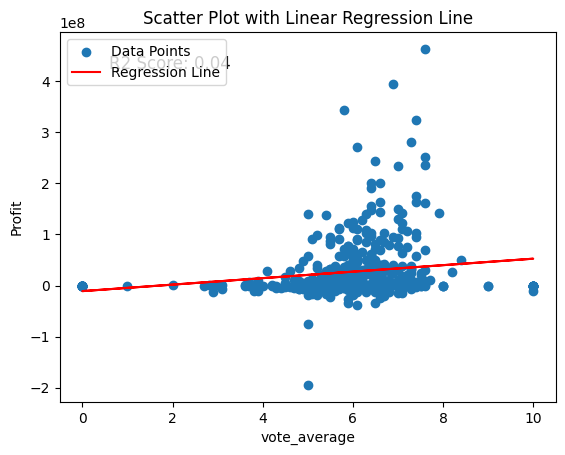

In [235]:
sampled_data = horror_films_df.sample(n=500)  # Adjust the 'n' value as needed

x_axis = sampled_data['vote_average']
y_axis = sampled_data['profit']

slope, intercept, r, p, std_err = stats.linregress(x_axis, y_axis)

def regression_func(x_axis):
    return slope * x_axis + intercept

model = list(map(regression_func, x_axis))

plt.scatter(x_axis, y_axis, label='Data Points')
plt.plot(x_axis, model, 'r', label='Regression Line')

# Add the R-squared (R2) score as text on the graph
r_squared = r**2
plt.text(0.1, 0.9, f'R2 Score: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add a title and labels for the x and y axes
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('vote_average')
plt.ylabel('Profit')

# Add a legend to distinguish between data points and the regression line
plt.legend()

plt.show()